## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

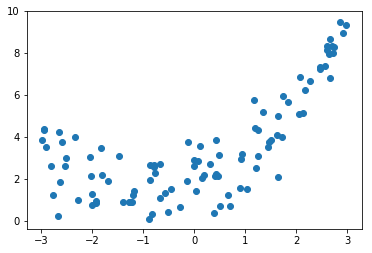

In [3]:
plt.scatter(x, y)

### 使用线性回归

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4622467465310617

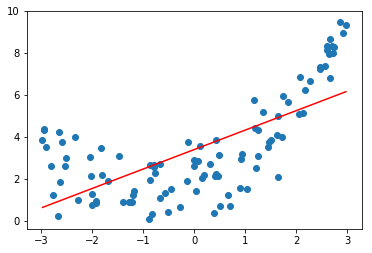

In [6]:
y_predict = lin_reg.predict(X)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")

可见数据之间的线性关系是很弱的

### 使用均方误差进行衡量

In [7]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.1616305212792186

使用线性回归得到的均方误差为3.16

### 使用多项式回归

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [9]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [10]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0094644945446116

使用多项式回归显然比使用线性回归得到的均方误差要小

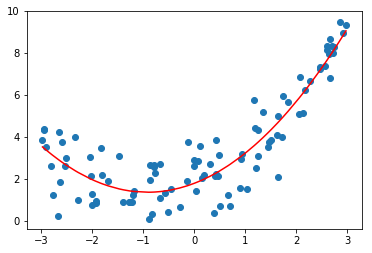

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color="r")

我们发现当 degree=2 结果是非常好的，不过你肯定想如果degree传入其它的值会怎样呢？

In [12]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

0.9205903432365098

我们发现 degree=10 之后，得到的均方误差更小。

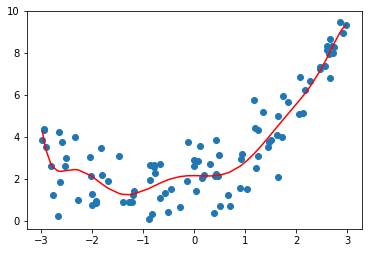

In [13]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color="r")

In [14]:
# 如果degree=100
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.5072553200137868

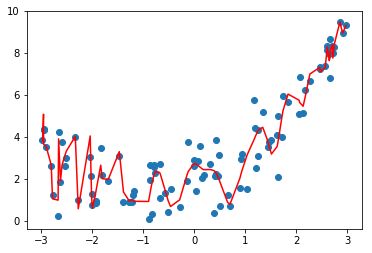

In [16]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color="r")

事实上，degree=100的时候，我们得到的这个图像并不是我们计算出来的真正的拟合曲线。是因为我们的这个图像绘制出来的这个曲线它们只是原有的数据点之间对应的 y 的预测值连接出来的结果，不过有很多地方可能没有数据点，所以这个连接的结果和原来的曲线不同。

在这里，我们尝试一下还原原来的曲线。

[-3, 3, -1, 10]

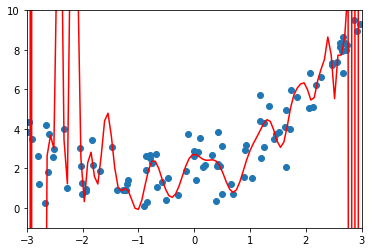

In [17]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color="r")
plt.axis([-3, 3, -1, 10])

### train_test_split的意义

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 线性模型

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

3.2570031877947425

### 多项式回归

In [21]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.9421580212349356

In [22]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

1.7159115379076066

In [23]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

976764874122.5145

当 degree=100 时，误差已经非常大了。